In [43]:

# Author: Danny Gonzalez
# Date: 04/19/21
# ISTA 131 
# Description: This program will analyzie the chances of a heart attack using grpahs


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
data = pd.read_csv(r'C:\Users\danny\Downloads\heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df = data.copy()

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(inplace=True) # dropping the duplicated rows
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [10]:
df.isnull().sum() # Checking the null values


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [14]:
#Changes the colum values so that they are easier to understand
df['exng'] = df['exng'].map({1:'yes',0:'no'})
df['cp'] = df['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['fbs'] = df['fbs'].map({1:'true',0:'false'})
df['restecg'] = df['restecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'showing probable or definite left ventricular hypertrophy'})
df['output'] = df['output'].map({0:'less chance of heart attack',1:'risk of heart attack'})
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
245,56,0,NaN,134,409,NaN,NaN,150,NaN,1.9,1,2,3,NaN
216,63,1,NaN,130,330,NaN,NaN,132,NaN,1.8,2,3,3,NaN
186,54,1,NaN,124,266,NaN,NaN,109,NaN,2.2,1,1,3,NaN
153,66,0,NaN,146,278,NaN,NaN,152,NaN,0.0,1,1,2,NaN
64,58,1,NaN,140,211,NaN,NaN,165,NaN,0.0,2,0,2,NaN


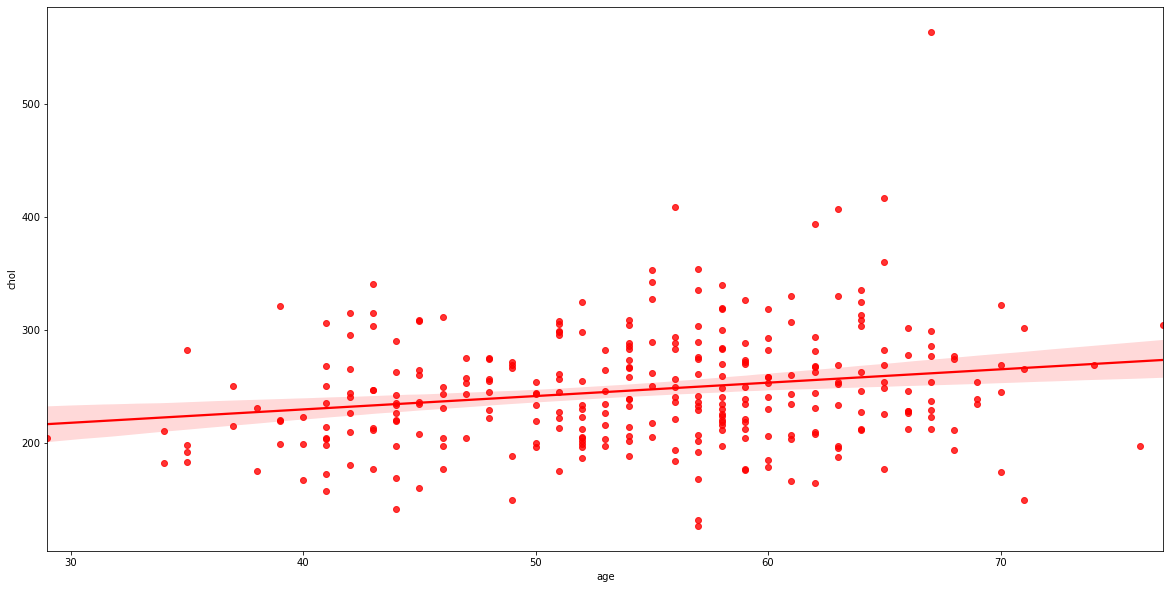

In [15]:
plt.figure(figsize = (20,10))
sns.regplot(x = df['age'], y = df['chol'], color = 'red')